# NLP

## importing Libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

## importing dataset

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## building our nlp model

In [4]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)


In [6]:
print(corpus[:20])

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like']


## vectorizing our dataset(i.e. nlp)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Classification

## GaussianNB

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))


Accuracy:  0.73
F1 Score:  0.7711864406779663
Precision:  0.6842105263157895
Recall:  0.883495145631068


In [12]:
classifier_performances = pd.DataFrame(columns = ['Classifier', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
classifier_performances.loc[0] = ['Naive Bayes', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[1] = ['KNN', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[68 29]
 [42 61]]
Accuracy:  0.645
F1 Score:  0.6321243523316062
Precision:  0.6777777777777778
Recall:  0.5922330097087378


## SVC

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[2] = ['SVM', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[79 18]
 [24 79]]
Accuracy:  0.79
F1 Score:  0.79
Precision:  0.8144329896907216
Recall:  0.7669902912621359


## SVC - Kernel

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[3] = ['SVM - RBF', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[89  8]
 [36 67]]
Accuracy:  0.78
F1 Score:  0.752808988764045
Precision:  0.8933333333333333
Recall:  0.6504854368932039


## Decision-Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[4] = ['Decision Tree', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[78 19]
 [31 72]]
Accuracy:  0.75
F1 Score:  0.7422680412371134
Precision:  0.7912087912087912
Recall:  0.6990291262135923


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[5] = ['Logistic Regression', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[80 17]
 [28 75]]
Accuracy:  0.775
F1 Score:  0.7692307692307693
Precision:  0.8152173913043478
Recall:  0.7281553398058253


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

classifier_performances.loc[6] = ['Random Forest', accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

[[80 17]
 [28 75]]
Accuracy:  0.775
F1 Score:  0.7692307692307693
Precision:  0.8152173913043478
Recall:  0.7281553398058253


In [19]:
classifier_performances

,Classifier,Accuracy,F1 Score,Precision,Recall
0,Naive Bayes,0.730,0.771186,0.684211,0.883495
1,KNN,0.645,0.632124,0.677778,0.592233
2,SVM,0.790,0.790000,0.814433,0.766990
3,SVM - RBF,0.780,0.752809,0.893333,0.650485
4,Decision Tree,0.750,0.742268,0.791209,0.699029
5,Logistic Regression,0.775,0.769231,0.815217,0.728155
6,Random Forest,0.775,0.769231,0.815217,0.728155


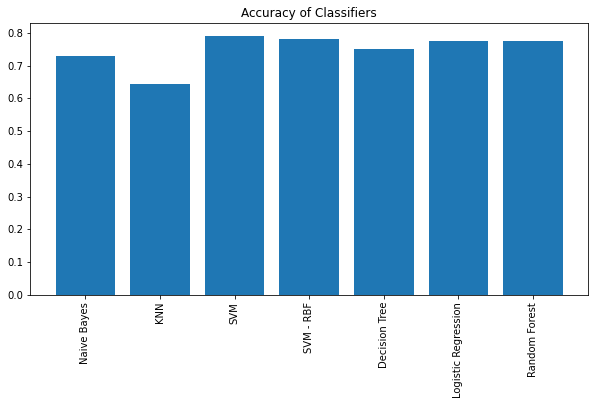

In [20]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['Accuracy'])
plt.title('Accuracy of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

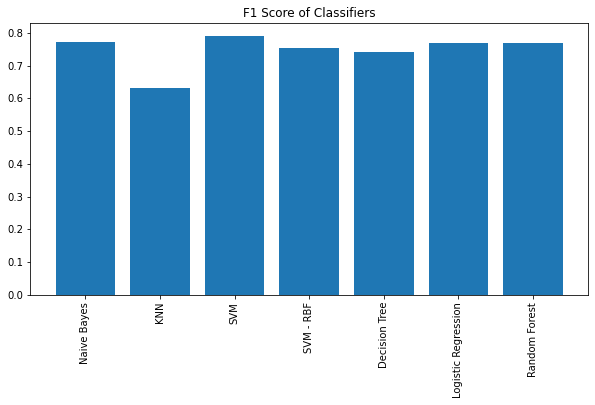

In [21]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['F1 Score'])
plt.title('F1 Score of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

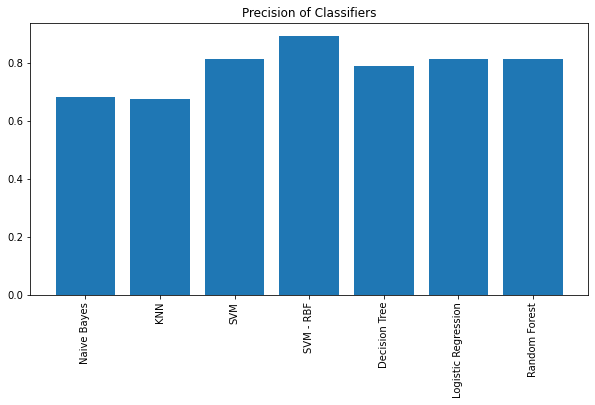

In [22]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['Precision'])
plt.title('Precision of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

Example

In [27]:
# since SVC had best performance, i will use it for our final model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

new_review = 'I hate this restaurant so much'
review = re.sub('[^a-zA-Z]', ' ', new_review)
review = review.lower()
review = review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
review = ' '.join(review)
print(review)
new_corpus = [review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

hate restaur much
[0]
